# Frequency & Phase Modulation (FM,PM)

In [11]:
import numpy as np
from math import pi
from numpy import cos, absolute
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

FM Modulation

In [13]:
fs = 8000 # Sampling Frequency
fc = 100 # Carrier Frequency
Ac = 1 # Carrier Amplitude
fm = 5 # Message Frequency
Am = 1 # Message Amplitude
kf = 100*pi # Modulation Coefficient

Time Domain Analysis

In [14]:
t = np.arange(0,1,1/fs)
M = Am*cos(2*pi*fm*t) # Message Signal
C = Ac*cos(2*pi*fc*t) # Carrier Signal

In [16]:
from scipy.integrate import simps
M_int = [0,]
for i in range(1,len(t)):
    M_int.append(simps(M[:i],t[:i]))

In [17]:
s_FM = []
for (ti, m) in zip(t, M_int):
    s_FM.append(Ac*cos(2*pi*fc*ti + kf*m))

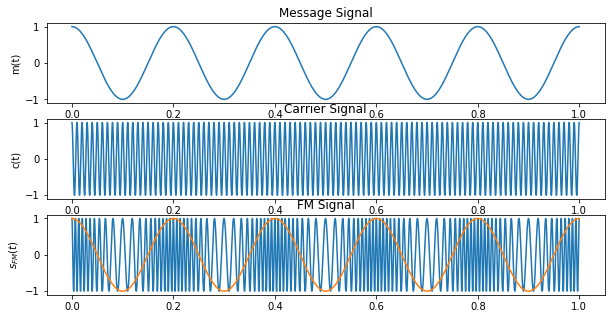

In [18]:
fig, axs = plt.subplots(3,1)
axs[0].plot(t,M)
axs[0].set(ylabel = 'm(t)')
axs[0].set_title('Message Signal')
axs[1].plot(t,C)
axs[1].set(ylabel = 'c(t)')
axs[1].set_title('Carrier Signal')
axs[2].plot(t,s_FM,t,M)
axs[2].set(ylabel ='$s_{FM}(t)$')
axs[2].set_title('FM Signal')
plt.show()

In [19]:
M_f = fftshift(absolute(fft(M)))
f = np.linspace(-fs/2, fs/2, len(M_f)) # Frequency Grid

In [20]:
C_f = fftshift(absolute(fft(C)))

In [21]:
S_FM_f = fftshift(absolute(fft(s_FM)))
beta = (kf*Am/(2*pi))/fm
BW = 2*fm*(beta+1)
BW_bound = np.zeros(len(f))
for i in range(len(f)):
    if(abs(f[i])<(fc + BW/2) and abs(f[i])>(fc - BW/2)):
        BW_bound[i] = 1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new

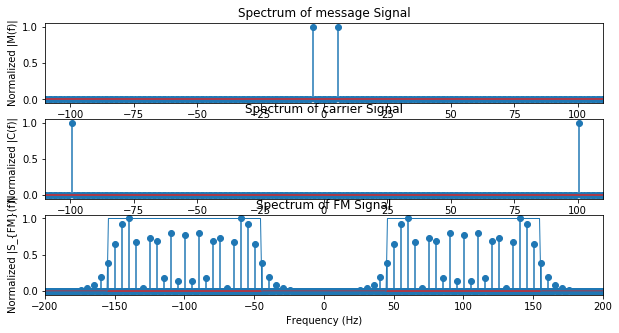

In [22]:
fig, axs = plt.subplots(3,1)
axs[0].stem(f, M_f/M_f.max())
axs[0].set(xlabel = 'Frequency (Hz)', ylabel = 'Normalized |M(f)|', xlim = (-110,110))
axs[0].set_title('Spectrum of message Signal')
axs[1].stem(f, C_f/C_f.max())
axs[1].set(xlabel = 'Frequency (Hz)', ylabel = 'Normalized |C(f)|', xlim = (-110,110))
axs[1].set_title('Spectrum of carrier Signal')
axs[2].stem(f, S_FM_f/S_FM_f.max())
axs[2].plot(f, BW_bound, linewidth = 1)
axs[2].set(xlabel = 'Frequency (Hz)', ylabel = 'Normalized |S_{FM}(f)|', xlim = (-200,200))
axs[2].set_title('Spectrum of FM Signal')
plt.show()

PM Modulation

In [23]:
fs = 8000 # Sampling Frequency
fc = 100 # Carrier Frequency
Ac = 1 # Carrier Amplitude
fm = 5 # Message Frequency
Am = 1 # Message Amplitude
kp = 20 # Modulation Coefficient

Time Domain Analysis

In [24]:
t = np.arange(0,1,1/fs)
M = Am*cos(2*pi*fm*t) # Message Signal
C = Ac*cos(2*pi*fc*t) # Carrier Signal

In [25]:
s_PM = []
for (ti, m) in zip(t, M):
    s_PM.append(Ac*cos(2*pi*fc*ti + kp*m))

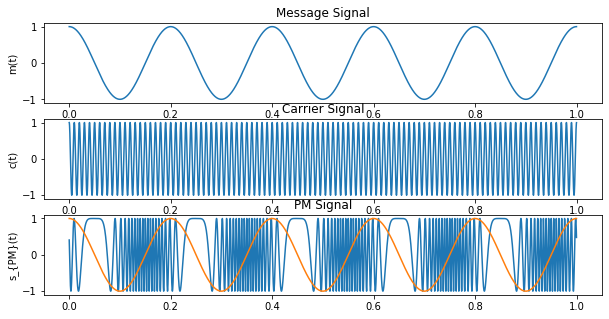

In [26]:
fig, axs = plt.subplots(3,1)
axs[0].plot(t,M)
axs[0].set(ylabel = 'm(t)')
axs[0].set_title('Message Signal')
axs[1].plot(t,C)
axs[1].set(ylabel = 'c(t)')
axs[1].set_title('Carrier Signal')
axs[2].plot(t,s_PM,t,M)
axs[2].set(ylabel ='s_{PM}(t)')
axs[2].set_title('PM Signal')
plt.show()

In [27]:
M_f = fftshift(absolute(fft(M)))
f = np.linspace(-fs/2, fs/2, len(M_f)) # Frequency Grid

In [28]:
C_f = fftshift(absolute(fft(C)))

In [29]:
M_diff = np.zeros(len(t))
M_diff[1:] = np.diff(M)
Ap = np.max(M_diff)
S_PM_f = fftshift(absolute(fft(s_PM)))
beta = (kp*Ap/(2*pi))/fm
BW = 2*fm*(beta+1)
BW_bound = np.zeros(len(f))
for i in range(len(f)):
    if(abs(f[i])<(fc + BW/2)):
        BW_bound[i] = 1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new

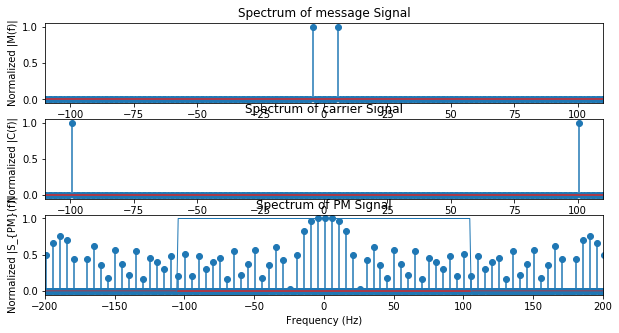

In [30]:
fig, axs = plt.subplots(3,1)
axs[0].stem(f, M_f/M_f.max())
axs[0].set(xlabel = 'Frequency (Hz)', ylabel = 'Normalized |M(f)|', xlim = (-110,110))
axs[0].set_title('Spectrum of message Signal')
axs[1].stem(f, C_f/C_f.max())
axs[1].set(xlabel = 'Frequency (Hz)', ylabel = 'Normalized |C(f)|', xlim = (-110,110))
axs[1].set_title('Spectrum of carrier Signal')
axs[2].stem(f, S_PM_f/S_PM_f.max())
axs[2].plot(f, BW_bound, linewidth = 1)
axs[2].set(xlabel = 'Frequency (Hz)', ylabel = 'Normalized |S_{PM}(f)|', xlim = (-200,200))
axs[2].set_title('Spectrum of PM Signal')
plt.show()